In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.6.2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
fraud_detect_data = pd.read_csv("creditcard.csv")
fraud_detect_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
fraud_detect_data.drop('Time', axis= 1,inplace=True)
fraud_detect_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Processing and Exploratory Data Analysis

In [5]:
no_of_cases = len(fraud_detect_data)
print(" The  total number of   unique cases is ",no_of_cases)
# cases without fraud
no_of_non_fraudcases =  len(fraud_detect_data[fraud_detect_data.Class == 0])
print("The  total number of  non_fraudcases is {}".format(no_of_non_fraudcases))
no_of_fraud_cases = len(fraud_detect_data[fraud_detect_data.Class == 1])
print(" The  total number of  fraudcases is ",no_of_non_fraudcases)

percentage_fraud = round(no_of_fraud_cases/no_of_non_fraudcases*100, 2)
print(" The  total number of  percentagefraudcases is ",percentage_fraud)

 The  total number of   unique cases is  284807
The  total number of  non_fraudcases is 284315
 The  total number of  fraudcases is  284315
 The  total number of  percentagefraudcases is  0.17


In [6]:
fraud_detect_data['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

In [7]:
fraud_detect_data.shape

(284807, 30)

In [8]:
fraud_detect_data.isnull().sum()


V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
fraud_detect_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [10]:
# value_counts() returns a Series containing counts of unique values. This data has 2 classes 0 and 1. We can see that data with label 0 is a lot higher than data with label 1. Hence this data is highly unbalanced.

In [11]:
fraud_detect_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# As shown, it can be seen that the  data is imbalanced


In [12]:
non_fraud = fraud_detect_data[fraud_detect_data['Class']==0]
fraud = fraud_detect_data[fraud_detect_data['Class']==1]
non_fraud.shape, fraud.shape

((284315, 30), (492, 30))

# Balancing the data

In [13]:
# To balance the data we will select 492 transactions randomly from non_fraud.Now you can see that non_fraud has 492 rows.

In [14]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 30)

In [15]:
fraud_detect_data = fraud.append(non_fraud, ignore_index=True)
fraud_detect_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [16]:
fraud_detect_data['Class'].value_counts()


1    492
0    492
Name: Class, dtype: int64

# Feature selection and data split

In [17]:
#creating data split
X_cnn = fraud_detect_data.drop('Class', axis = 1)
y_cnn = fraud_detect_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X_cnn, y_cnn, test_size = 0.2, random_state = 0,stratify=y_cnn)


#  Standardization is performed to reducethe variance of the data and 
# This helps improve the performance  of the model 

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

X_train.shape, X_test.shape

((787, 29), (197, 29))

In [20]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

X_train.shape, X_test.shape

((787, 29, 1), (197, 29, 1))

In [19]:
# Credit Card Fraud Detection using CNN

# Building the CNN models

In [21]:
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 28, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 28, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 27, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 27, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1728)              0

In [23]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

C:\Users\Hp\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [24]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
25/25 [==============================] - 4s 32ms/step - loss: 0.7446 - accuracy: 0.6582 - val_loss: 0.6085 - val_accuracy: 0.7817
Epoch 2/20
25/25 [==============================] - 0s 11ms/step - loss: 0.4161 - accuracy: 0.8424 - val_loss: 0.5691 - val_accuracy: 0.7665
Epoch 3/20
25/25 [==============================] - 0s 12ms/step - loss: 0.4165 - accuracy: 0.8475 - val_loss: 0.5396 - val_accuracy: 0.7868
Epoch 4/20
25/25 [==============================] - 0s 11ms/step - loss: 0.3356 - accuracy: 0.8793 - val_loss: 0.5040 - val_accuracy: 0.8376
Epoch 5/20
25/25 [==============================] - 0s 12ms/step - loss: 0.3550 - accuracy: 0.8882 - val_loss: 0.4639 - val_accuracy: 0.8477
Epoch 6/20
25/25 [==============================] - 0s 12ms/step - loss: 0.2768 - accuracy: 0.8945 - val_loss: 0.4275 - val_accuracy: 0.8782
Epoch 7/20
25/25 [==============================] - 0s 13ms/step - loss: 0.2541 - accuracy: 0.8996 - val_loss: 0.3889 - val_accuracy: 0.8782
Epoch 8/20
25

# plotting train and validation loss and accuracy

In [28]:
def plotting_the_modellearningCurve(history,epoch):
    #train and validation loss
    epoch_range = range(1,epoch+1)
    plt.plot(epoch_range,history.history['accuracy'])
    plt.plot(epoch_range,history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()
    #train and validation accuracy
    epoch_range = range(1,epoch+1)
    plt.plot(epoch_range,history.history['loss'])
    plt.plot(epoch_range,history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()

    

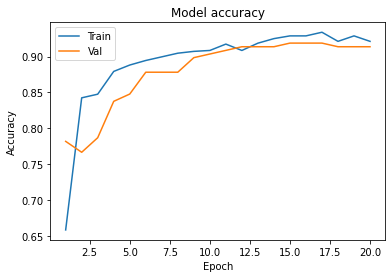

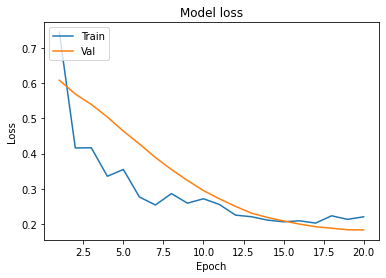

In [29]:
plotting_the_modellearningCurve(history, epochs)


In [ ]:
The training accuracy is higher than the validation accuracy, hence the model is overfitting. 
We then add a MaxPool layer and increase the nuber of epochs to improve our accuracy

In [30]:
epochs = 50
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
25/25 [==============================] - 3s 26ms/step - loss: 1.1620 - accuracy: 0.5502 - val_loss: 0.6762 - val_accuracy: 0.6294
Epoch 2/50
25/25 [==============================] - 0s 11ms/step - loss: 0.9153 - accuracy: 0.6137 - val_loss: 0.6545 - val_accuracy: 0.6904
Epoch 3/50
25/25 [==============================] - 0s 12ms/step - loss: 0.7180 - accuracy: 0.6811 - val_loss: 0.6346 - val_accuracy: 0.6701
Epoch 4/50
25/25 [==============================] - 0s 12ms/step - loss: 0.6718 - accuracy: 0.7217 - val_loss: 0.6151 - val_accuracy: 0.6701
Epoch 5/50
25/25 [==============================] - 0s 12ms/step - loss: 0.6411 - accuracy: 0.7408 - val_loss: 0.5938 - val_accuracy: 0.6802
Epoch 6/50
25/25 [==============================] - 0s 12ms/step - loss: 0.5262 - accuracy: 0.7814 - val_loss: 0.5693 - val_accuracy: 0.6954
Epoch 7/50
25/25 [==============================] - 0s 13ms/step - loss: 0.5335 - accuracy: 0.7687 - val_loss: 0.5420 - val_accuracy: 0.7310
Epoch 8/50
25

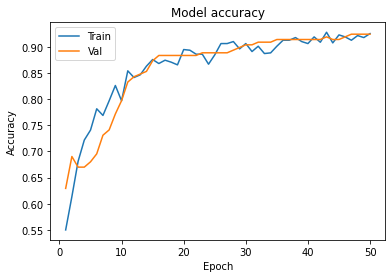

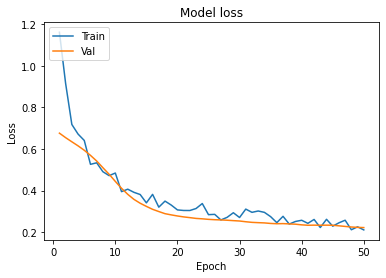

In [31]:
plotting_the_modellearningCurve(history, epochs)


In [ ]:
#The model accuracy rimproved as shown